In [9]:
# %load /Users/facai/Study/book_notes/preconfig.py
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import SVG

决策树在 sklearn 中的实现简介
============================

##### 0. 预前
本文简单分析 [scikit-learn/scikit-learn](https://github.com/scikit-learn/scikit-learn) 中决策树涉及的代码模块关系。

分析的代码版本信息是：
```shell
~/W/s/sklearn ❯❯❯ git log -n 1                                                                                                                                                         study/analyses_decision_tree
commit d161bfaa1a42da75f4940464f7f1c524ef53484f
Author: John B Nelson <jnelso11@gmu.edu>
Date:   Thu May 26 18:36:37 2016 -0400

    Add missing double quote (#6831)
```

本文假设读者已经了解决策树的其本概念，阅读 [sklearn - Decision Trees](http://scikit-learn.org/stable/modules/tree.html) 有助于快速了解。 

### 1. 总纲

决策树的代码位于 `scikit-learn/sklearn/tree` 目录下，各文件大意说明如下：

```
tree
+-- __init__.py
+-- setup.py            
+-- tree.py             主文件
+-- export.py           导出树模型
+-- _tree.*             组建树的类
+-- _splitter.*         分割方法
+-- _criterion.*        不纯度评价
+-- _utils.*            辅助数据结构：栈和最小堆 
+-- tests/
    +-- __init__.py
    +-- test_tree.py
    +-- test_export.py
```

类之间的大致关系如下：

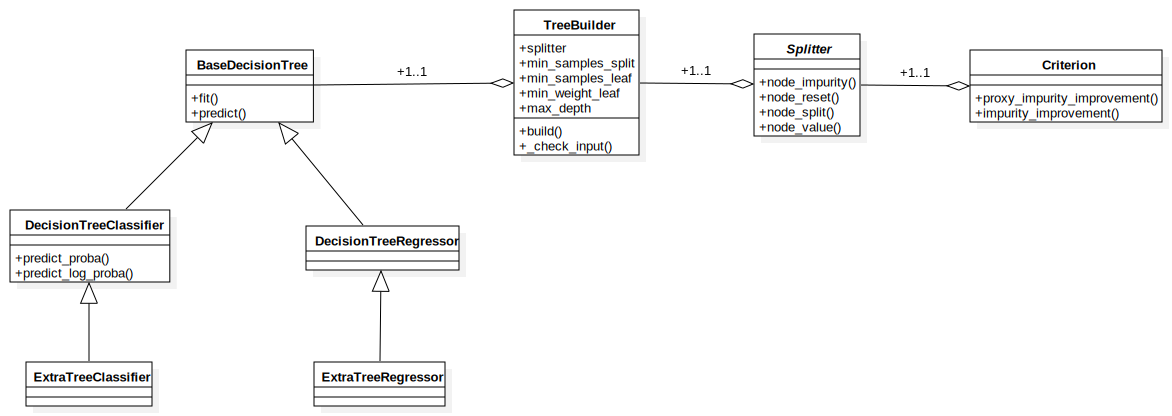

In [11]:
SVG("./res/uml/Model__tree_0.svg")

`Tree.py` 下定义了 `BaseDecisionTree` 基类，实现了完整的分类和回规功能，衍生出的基类作封装初始化参数的作用。其中，`DecisionTree*` 类会遍历特征和值，从而找到最佳分割点，而 `ExtraTree*` 类会随机抽取特征和值，来寻找分割点。

```python
  72 class BaseDecisionTree(six.with_metaclass(ABCMeta, BaseEstimator,
  73                                           _LearntSelectorMixin)):
  74     """Base class for decision trees.
  75 #+--  3 lines: Warning: This class should not be used directly.-------------------
  78     """
  79
  80     @abstractmethod
  81     def __init__(self,
  82 #+-- 30 lines: criterion,---------------------------------------------------------
 112
 113     def fit(self, X, y, sample_weight=None, check_input=True,
 114             X_idx_sorted=None):
 115         """Build a decision tree from the training set (X, y).
 116 #+-- 34 lines: Parameters---------------------------------------------------------
 150         """
 151
 152 #+--180 lines: random_state = check_random_state(self.random_state)---------------
 332
 333         # Build tree
 334         criterion = self.criterion
 335 #+--  6 lines: if not isinstance(criterion, Criterion):---------------------------
 341
 342         SPLITTERS = SPARSE_SPLITTERS if issparse(X) else DENSE_SPLITTERS
 343 #+--  9 lines: splitter = self.splitter-------------------------------------------
 352
 353         self.tree_ = Tree(self.n_features_, self.n_classes_, self.n_outputs_)
 354
 355         # Use BestFirst if max_leaf_nodes given; use DepthFirst otherwise
 356         if max_leaf_nodes < 0:
 357             builder = DepthFirstTreeBuilder(splitter, min_samples_split,
 358                                             min_samples_leaf,
 359                                             min_weight_leaf,
 360                                             max_depth)
 361         else:
 362             builder = BestFirstTreeBuilder(splitter, min_samples_split,
 363                                            min_samples_leaf,
 364                                            min_weight_leaf,
 365                                            max_depth,
 366                                            max_leaf_nodes)
 367
 368         builder.build(self.tree_, X, y, sample_weight, X_idx_sorted)
 369
 370 #+--  3 lines: if self.n_outputs_ == 1:-------------------------------------------
 373
 374         return self
```